In [2]:
from tensorflow import keras

In [3]:
model = keras.models.load_model('best-cnn-model.h5')

In [4]:
model.layers

In [5]:
conv =model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [6]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

0.011682459 0.13112508


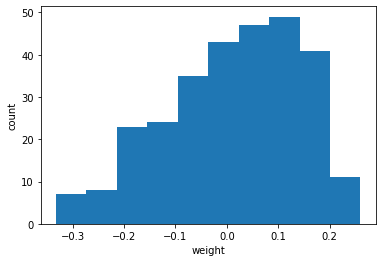

In [7]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()


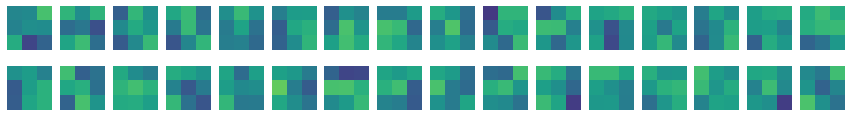

In [8]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
    
plt.show()

In [9]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [11]:
no_training_conv= no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [12]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())


-0.0062575936 0.0857946


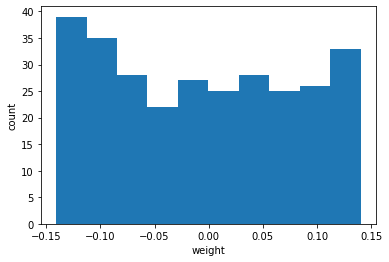

In [13]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

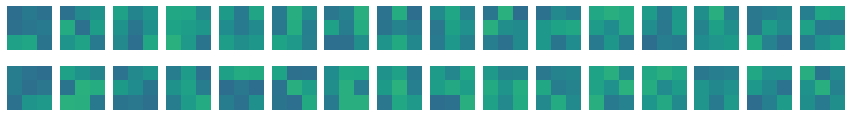

In [14]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [15]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [17]:
conv_acti = keras.Model(model.input, model.layers[0].output)

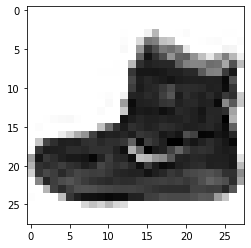

In [23]:
(train_input, train_target), (test_input, test_target)=keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [25]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps= conv_acti.predict(inputs)

In [26]:
print(feature_maps.shape)

(1, 28, 28, 32)


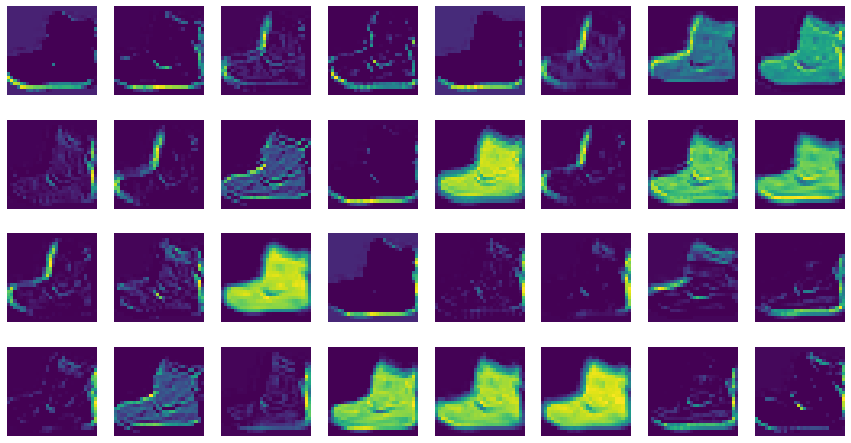

In [28]:
fig,axs=plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [29]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [30]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)

In [31]:
print(feature_maps.shape)

(1, 14, 14, 64)


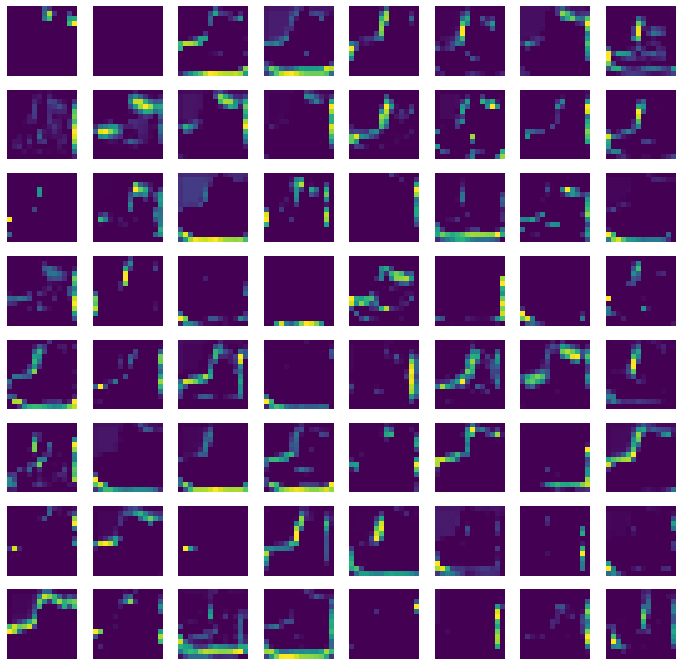

In [33]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()